In [1]:
import numpy as np

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

def conv_circuit(kernel_size, params):
    target = QuantumCircuit(kernel_size)

    for i in range(kernel_size-1):
        target.rz(-np.pi / 2, i+1)
        target.crx(params[i*3], i+1, 0)
        target.cry(params[i*3+1], i+1, 0)
        target.crz(params[i*3+2], i+1, 0)
    target.rz(np.pi / 2, 0)
    return target  


def conv_layer(kernel_size, info_qs, param_prefix):
    conv_size = info_qs - kernel_size + 1
    num_qubits = info_qs

    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))

    param_index = 0
    params = ParameterVector(param_prefix, length=conv_size * (kernel_size-1) * 3)
    
    for i in range(conv_size):
        q_list = qubits[i:i+kernel_size]
        qc = qc.compose(other=conv_circuit(kernel_size, params[param_index : (param_index + 3 * (kernel_size-1))]), qubits=q_list)
        qc.barrier()
        param_index += 3 * (kernel_size-1)
    
    qc_inst = qc.to_instruction()
    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc

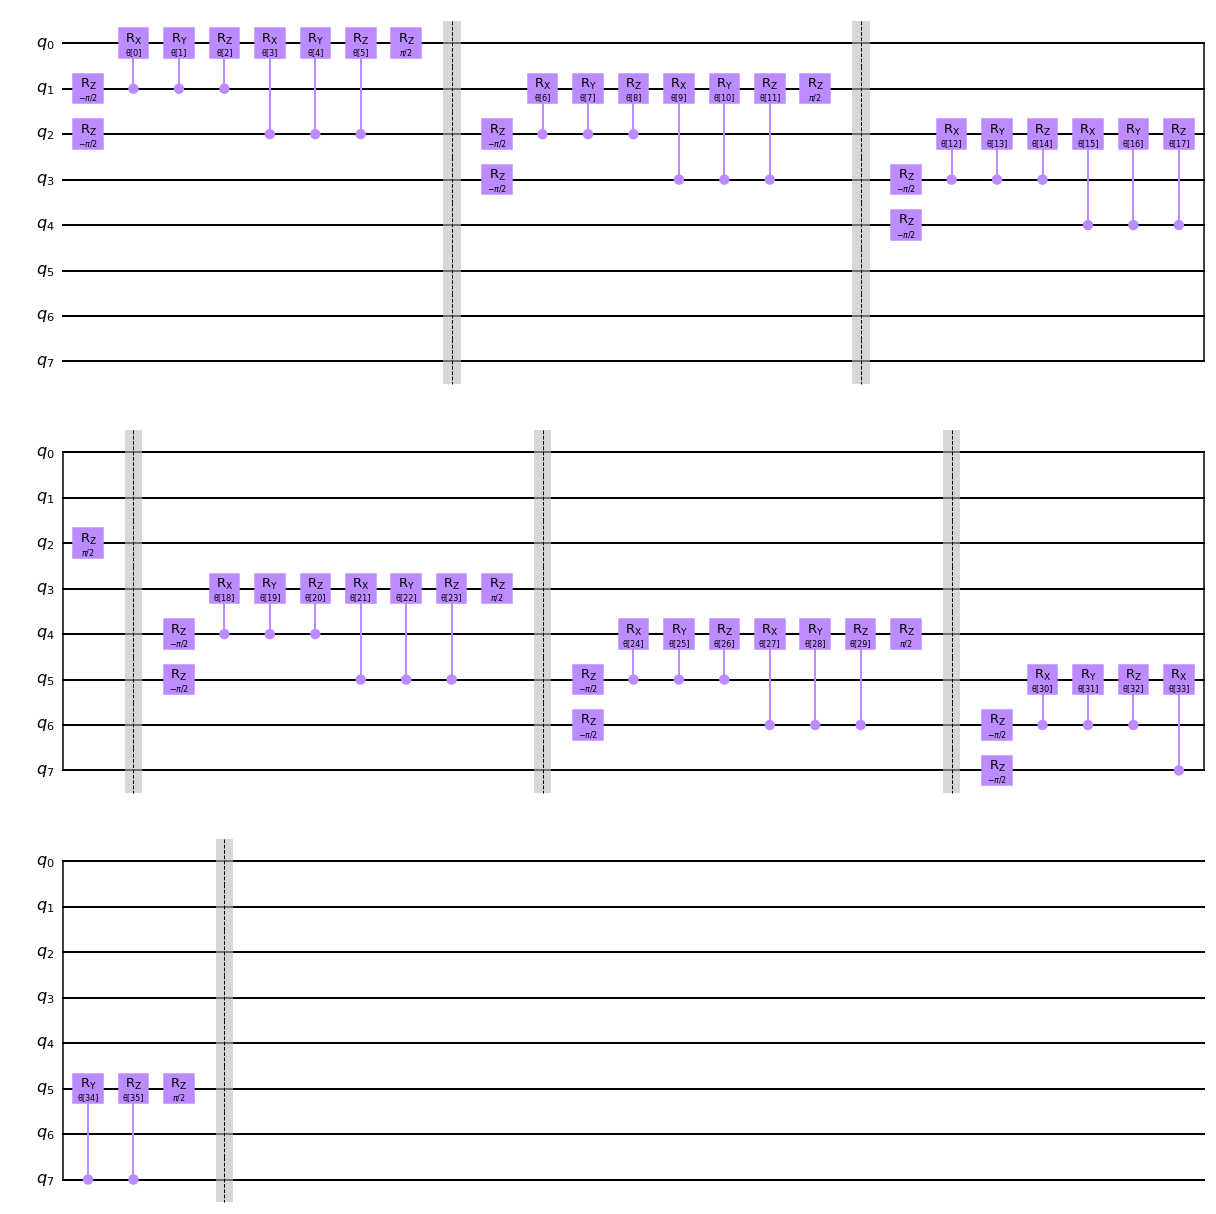

In [3]:
circuit = conv_layer(3, 8, "θ")
circuit.decompose().draw("mpl")